#Data Loading

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataframe
print("Initial Data:")
print(df.head())
print("\nData Info:")
print(df.info())

Initial Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#Data Cleaning

In [18]:
# Rename columns for clarity
df.rename(columns={'CustomerID': 'customer_id', 'Genre': 'gender',
                   'Age': 'age', 'Annual Income (k$)': 'annual_income',
                   'Spending Score (1-100)': 'spending_score'}, inplace=True)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Missing Values:
customer_id       0
Gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

Descriptive Statistics:
       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000


#Visualizing Distributions

## Univariate Analysis

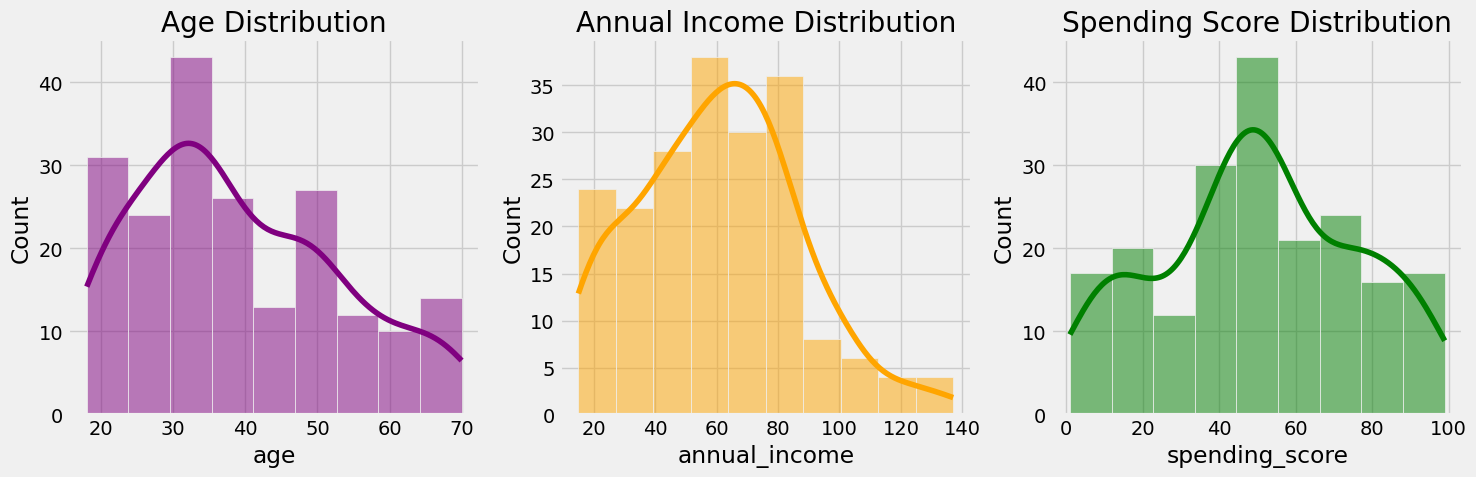

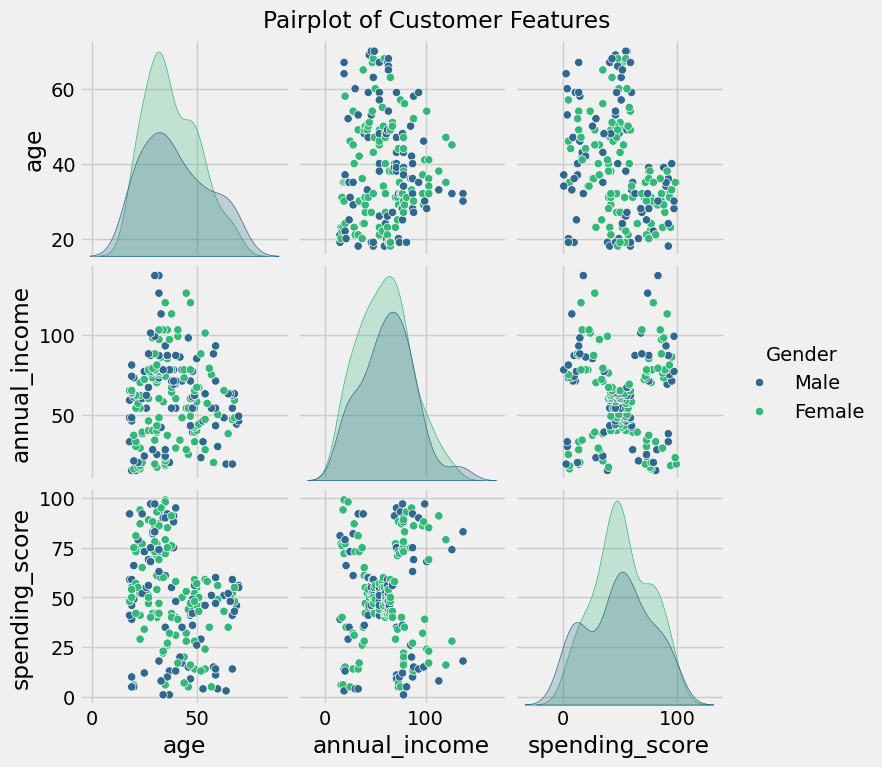

/tmp/ipython-input-4056208.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


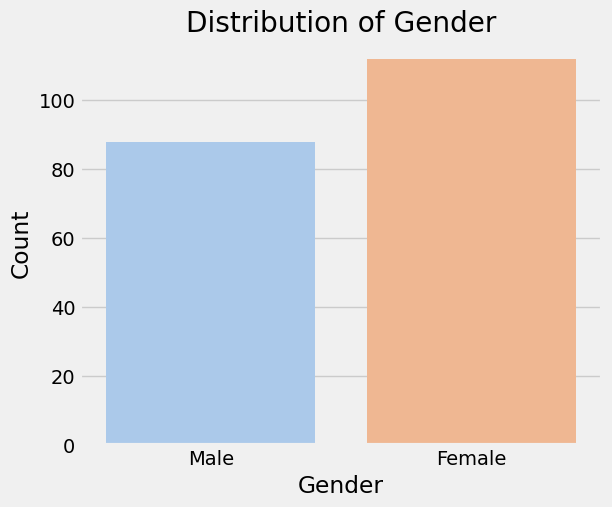

In [19]:
# Plot histograms for numerical features
plt.figure(figsize=(15, 5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, color='purple')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['annual_income'], kde=True, color='orange')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['spending_score'], kde=True, color='green')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Visualize relationships with a pairplot
sns.pairplot(df.drop('customer_id', axis=1), hue='Gender', palette='viridis')
plt.suptitle('Pairplot of Customer Features', y=1.02)
plt.show()

# Plot the distribution of Gender
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bivariate and Multivariate Analysis

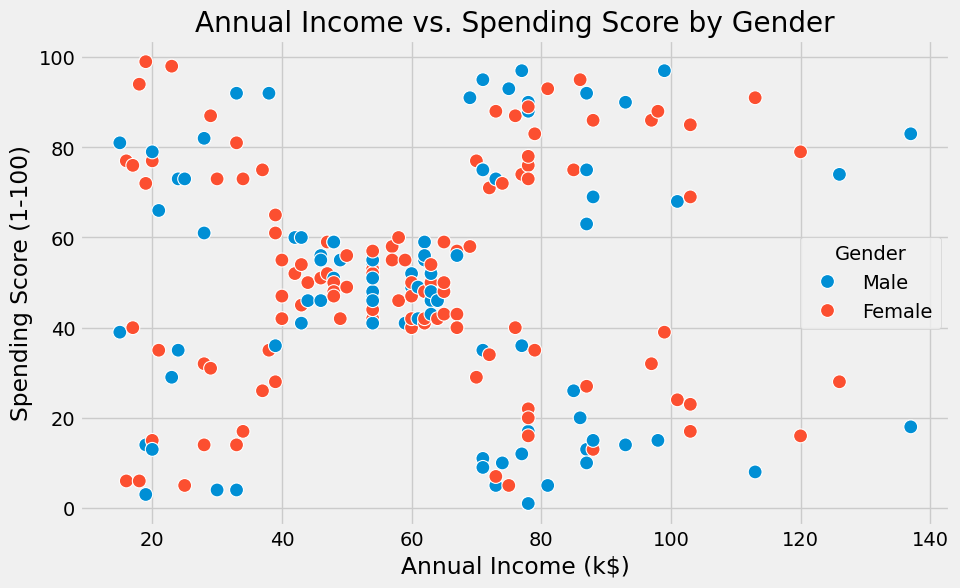

Pairplot of numerical features:


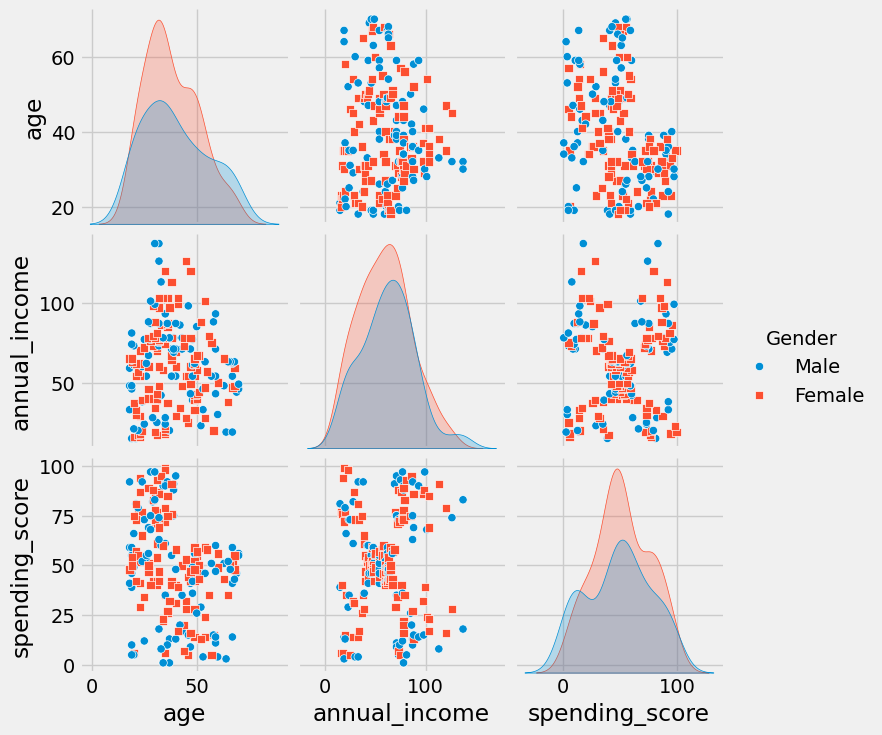

In [20]:
# Create a scatter plot of Annual Income vs. Spending Score
# This plot is central to this clustering project
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue='Gender', s=100)
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Create a pairplot to visualize all numerical relationships
# This can give you a holistic view of the data's structure
print("Pairplot of numerical features:")
sns.pairplot(df.drop('customer_id', axis=1), hue='Gender', markers=['o', 's'])
plt.show()

#Feature Selection and Scaling

In [21]:
# Select features for clustering
X = df[['annual_income', 'spending_score']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

print("\nScaled Data (first 5 rows):")
print(X_scaled[:5])


Scaled Data (first 5 rows):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


# K-Means Clustering

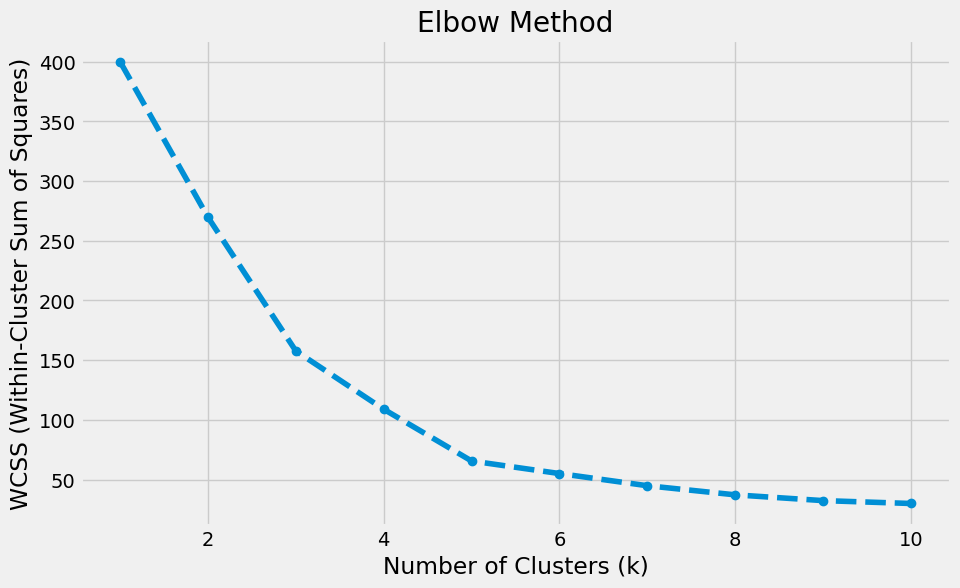

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

#Applying K-Means with Optimal

In [23]:
# Apply K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("\nDataFrame with Cluster Labels:")
print(df.head())


DataFrame with Cluster Labels:
   customer_id  Gender  age  annual_income  spending_score  cluster
0            1    Male   19             15              39        4
1            2    Male   21             15              81        2
2            3  Female   20             16               6        4
3            4  Female   23             16              77        2
4            5  Female   31             17              40        4


#Visualizing the Clusters

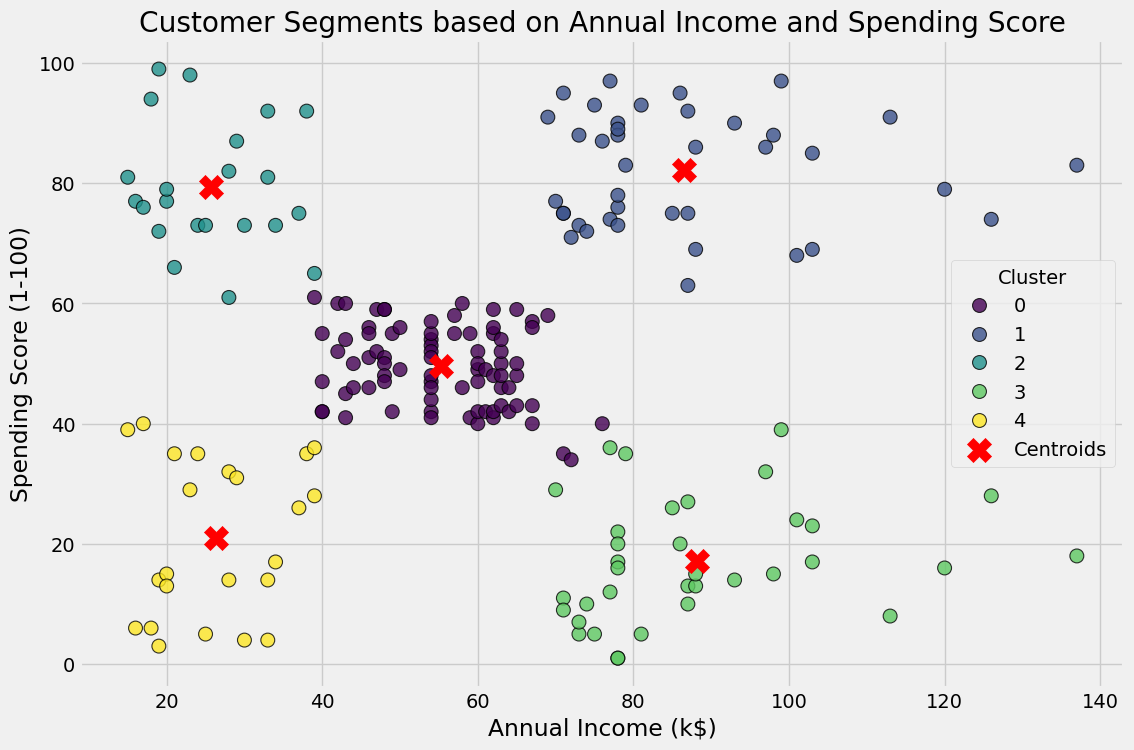

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='annual_income', y='spending_score', hue='cluster', data=df,
                palette='viridis', s=100, alpha=0.8, edgecolor='k')

# Plot the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Business Insights from Customer Segmentation

## Segment 1: The Frugal Shoppers

**Profile:** Customers with low income and low spending.

**Insight:** This group is highly price-sensitive. They represent a significant portion of the customer base that responds to value.

**Strategy:** Implement discount-focused campaigns, loyalty programs with tangible rewards, and highlight budget-friendly items.

## Segment 2: The Target Customers

**Profile:** Customers with average income and average spending.

**Insight:** This is the most substantial segment and the core of your revenue. Their behavior is predictable and stable.

**Strategy:** Maintain engagement through consistent personalized offers and communications that build brand loyalty.

## Segment 3: The Careful Spenders

**Profile:** Customers with low income but high spending scores.

**Insight:** This group is an opportunity for high-margin sales. Their spending habits suggest they are motivated by specific products or emotional purchases, not income.

**Strategy:** Use targeted social media ads and visually appealing campaigns to showcase trendy or exclusive items that drive impulsive purchases.

## Segment 4: The Responsible Spenders

**Profile:** Customers with high income but low spending scores.

**Insight:** This is a high-potential, untapped segment. Their low spending indicates they are discerning and not easily swayed by typical promotions.

**Strategy:** Attract them with premium product lines, exclusive-member events, and a focus on product quality and brand values over price.

## Segment 5: The Elite Spenders

**Profile:** Customers with high income and high spending.

**Insight:** Your most valuable and profitable segment. They are brand loyal and are not price-sensitive.

**Strategy:** Implement a top-tier VIP program with exclusive perks, early access to new collections, and personalized service to ensure continued loyalty and high lifetime value.